In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

In [18]:
#Lifetime and Degradation
#median annual power degradation Jordan et al 2022, Table 6
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index

df_shj_eff = pd.DataFrame(index=idx_temp, columns=['mod_eff'], dtype=float)
df_shj_eff.loc[2022] = 19.0
df_shj_eff.loc[2030] = 20.5
df_shj_eff.loc[2050] = 22
df_shj_eff.interpolate(inplace=True)

df_shj_deg = pd.DataFrame(index=idx_temp, columns=['mod_deg'], dtype=float)
df_shj_deg.loc[2022] = 1.6
df_shj_deg.loc[2030] = 1.4
df_shj_deg.loc[2050] = 1.2
df_shj_deg.interpolate(inplace=True)

#degradation rate:
#sim1.modifyScenario('SHJ', 'mod_degradation', df_shj_deg.loc[2022:,'mod_deg'], start_year=2022) 

#Mod Project Lifetime
df_shj_life = pd.DataFrame(index=idx_temp, columns=['mod_lifetime'], dtype=float)
df_shj_life.loc[2022] = 25
df_shj_life.loc[2030] = 25
df_shj_life.loc[2050] = 25
df_shj_life.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_lifetime', df_shj_life.loc[2022:,'mod_lifetime'], start_year=2022) #

#T50
df_shj_t50 = pd.DataFrame(index=idx_temp, columns=['mod_t50'], dtype=float)
df_shj_t50.loc[2022] = 25
df_shj_t50.loc[2030] = 28
df_shj_t50.loc[2050] = 40
df_shj_t50.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_reliability_t50', df_shj_t50.loc[2022:,'mod_t50'], start_year=2022)
#t90
df_shj_t90 = pd.DataFrame(index=idx_temp, columns=['mod_t90'], dtype=float)
df_shj_t90.loc[2022] = 30
df_shj_t90.loc[2030] = 33
df_shj_t90.loc[2050] = 44
df_shj_t90.interpolate(inplace=True)
#sim1.modifyScenario('SHJ', 'mod_reliability_t90', df_shj_t90.loc[2022:,'mod_t90'], start_year=2022) 

pd.concat([df_shj_eff,df_shj_t50,df_shj_t90,df_shj_deg,df_shj_life], axis=1)

,mod_eff,mod_t50,mod_t90,mod_deg,mod_lifetime
2022,19.0000,25.000,30.000,1.600,25.0
2023,19.1875,25.375,30.375,1.575,25.0
2024,19.3750,25.750,30.750,1.550,25.0
2025,19.5625,26.125,31.125,1.525,25.0
2026,19.7500,26.500,31.500,1.500,25.0
2027,19.9375,26.875,31.875,1.475,25.0
2028,20.1250,27.250,32.250,1.450,25.0
2029,20.3125,27.625,32.625,1.425,25.0
2030,20.5000,28.000,33.000,1.400,25.0
2031,20.5750,28.600,33.550,1.390,25.0


In [23]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
df_shj_merchanttail = pd.DataFrame(index=idx_temp, columns=['mod_merchanttail'], dtype=float)
df_shj_merchanttail.loc[2022] = 0
df_shj_merchanttail.loc[2030] = 0
df_shj_merchanttail.loc[2050] = 0
df_shj_merchanttail.interpolate(inplace=True)
#module collection
df_shj_modcollect = pd.DataFrame(index=idx_temp, columns=['mod_collect'], dtype=float)
df_shj_modcollect.loc[2022] = 15
df_shj_modcollect.loc[2030] = 30
df_shj_modcollect.loc[2050] = 75
df_shj_modcollect.interpolate(inplace=True)
#collection
#sim1.modifyScenario('SHJ', 'mod_EOL_collection_eff', df_shj_modcollect.loc[2022:,'mod_collect'], start_year=2022) #
df_shj_modremfg = pd.DataFrame(index=idx_temp, columns=['mod_remfg'], dtype=float)
df_shj_modremfg.loc[2022] = 0
df_shj_modremfg.loc[2030] = 0
df_shj_modremfg.loc[2050] = 0
df_shj_modremfg.interpolate(inplace=True)

#module recycling target
df_shj_modrecycle = pd.DataFrame(index=idx_temp, columns=['mod_recycle'], dtype=float)
df_shj_modrecycle.loc[2022] = 75
df_shj_modrecycle.loc[2030] = 80
df_shj_modrecycle.loc[2050] = 95
df_shj_modrecycle.interpolate(inplace=True)

df_modrecycle_alt = 100-df_shj_modremfg

pd.concat([df_shj_merchanttail,df_shj_modcollect,df_shj_modremfg,df_shj_modrecycle, df_modrecycle_alt], axis=1)

,mod_merchanttail,mod_collect,mod_remfg,mod_recycle,mod_remfg
2022,0.0,15.000,0.0,75.000,100.0
2023,0.0,16.875,0.0,75.625,100.0
2024,0.0,18.750,0.0,76.250,100.0
2025,0.0,20.625,0.0,76.875,100.0
2026,0.0,22.500,0.0,77.500,100.0
2027,0.0,24.375,0.0,78.125,100.0
2028,0.0,26.250,0.0,78.750,100.0
2029,0.0,28.125,0.0,79.375,100.0
2030,0.0,30.000,0.0,80.000,100.0
2031,0.0,32.250,0.0,80.750,100.0


In [2]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
glassimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 80
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
glassimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 50
glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 80
glassimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 90

glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 0
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 30
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 75

glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 0
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
glassimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 50
glassimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 100


glassimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 60
glassimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 80
glassimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 98

#EoL Recycling
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 90
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
#glassimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100
glassimprovedrecycle['mat_PG4_Recycling_target'] = 100-glassimprovedrecycle['mat_PG3_ReMFG_target']

glassimprovedrecycle['mat_Recycling_yield'].loc[2022] = 40
glassimprovedrecycle['mat_Recycling_yield'].loc[2030] = 60
glassimprovedrecycle['mat_Recycling_yield'].loc[2050] = 90

glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 0
glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 30
glassimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 75

glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 100
glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 100
glassimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


glassimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,80.0,50.00,0.00,0.0,0.00,60.0,100.00,40.0,0.00,100.0
2023,82.5,53.75,3.75,12.5,6.25,62.5,93.75,42.5,3.75,100.0
2024,85.0,57.50,7.50,25.0,12.50,65.0,87.50,45.0,7.50,100.0
2025,87.5,61.25,11.25,37.5,18.75,67.5,81.25,47.5,11.25,100.0
2026,90.0,65.00,15.00,50.0,25.00,70.0,75.00,50.0,15.00,100.0
2027,92.5,68.75,18.75,62.5,31.25,72.5,68.75,52.5,18.75,100.0
2028,95.0,72.50,22.50,75.0,37.50,75.0,62.50,55.0,22.50,100.0
2029,97.5,76.25,26.25,87.5,43.75,77.5,56.25,57.5,26.25,100.0
2030,100.0,80.00,30.00,100.0,50.00,80.0,50.00,60.0,30.00,100.0
2031,100.0,80.50,32.25,100.0,52.50,80.9,47.50,61.5,32.25,100.0


In [3]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Siimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 20
Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 30
Siimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 60

Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 0
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 50
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
Siimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 30
Siimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 80

Siimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Siimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 50
Siimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 90

#EoL Recycling
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 100
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 50
Siimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 10

Siimprovedrecycle['mat_Recycling_yield'].loc[2022] = 20
Siimprovedrecycle['mat_Recycling_yield'].loc[2030] = 30
Siimprovedrecycle['mat_Recycling_yield'].loc[2050] = 75

Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 0
Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 50
Siimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 90

Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 0
Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 100
Siimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


Siimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,100.0,20.00,0.00,100.0,0.00,0.00,100.00,20.00,0.00,0.0
2023,100.0,21.25,6.25,100.0,3.75,6.25,93.75,21.25,6.25,12.5
2024,100.0,22.50,12.50,100.0,7.50,12.50,87.50,22.50,12.50,25.0
2025,100.0,23.75,18.75,100.0,11.25,18.75,81.25,23.75,18.75,37.5
2026,100.0,25.00,25.00,100.0,15.00,25.00,75.00,25.00,25.00,50.0
2027,100.0,26.25,31.25,100.0,18.75,31.25,68.75,26.25,31.25,62.5
2028,100.0,27.50,37.50,100.0,22.50,37.50,62.50,27.50,37.50,75.0
2029,100.0,28.75,43.75,100.0,26.25,43.75,56.25,28.75,43.75,87.5
2030,100.0,30.00,50.00,100.0,30.00,50.00,50.00,30.00,50.00,100.0
2031,100.0,31.50,52.50,100.0,32.50,52.00,48.00,32.25,52.00,100.0


In [30]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Alimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 60
Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 70
Alimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 90

Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 100
Alimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 100

#REMFG

Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 0
Alimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 0

Alimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Alimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 0
Alimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 0

#EoL Recycling
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 100
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
Alimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100

Alimprovedrecycle['mat_Recycling_yield'].loc[2022] = 42
Alimprovedrecycle['mat_Recycling_yield'].loc[2030] = 75
Alimprovedrecycle['mat_Recycling_yield'].loc[2050] = 98

Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 100
Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 100
Alimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 100

Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 20
Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 50
Alimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 100


Alimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,100.0,60.00,100.0,100.0,0.0,0.0,100.0,42.000,100.0,20.00
2023,100.0,61.25,100.0,100.0,0.0,0.0,100.0,46.125,100.0,23.75
2024,100.0,62.50,100.0,100.0,0.0,0.0,100.0,50.250,100.0,27.50
2025,100.0,63.75,100.0,100.0,0.0,0.0,100.0,54.375,100.0,31.25
2026,100.0,65.00,100.0,100.0,0.0,0.0,100.0,58.500,100.0,35.00
2027,100.0,66.25,100.0,100.0,0.0,0.0,100.0,62.625,100.0,38.75
2028,100.0,67.50,100.0,100.0,0.0,0.0,100.0,66.750,100.0,42.50
2029,100.0,68.75,100.0,100.0,0.0,0.0,100.0,70.875,100.0,46.25
2030,100.0,70.00,100.0,100.0,0.0,0.0,100.0,75.000,100.0,50.00
2031,100.0,71.00,100.0,100.0,0.0,0.0,100.0,76.150,100.0,52.50


In [31]:
idx_temp = pd.RangeIndex(start=2022,stop=2051,step=1) #create the index
columns = ['mat_MFG_scrap_Recycled','mat_MFG_scrap_Recycling_eff','mat_MFG_scrap_Recycled_into_HQ',
           'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG','mat_PG3_ReMFG_target','mat_ReMFG_yield',
           'mat_PG4_Recycling_target','mat_Recycling_yield','mat_EOL_Recycled_into_HQ','mat_EOL_RecycledHQ_Reused4MFG']
Agimprovedrecycle = pd.DataFrame(index=idx_temp, columns=columns, dtype=float)

#MFGing Scrap
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2022] = 95
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2030] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled'].loc[2050] = 100

Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2022] = 97
Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2030] = 98
Agimprovedrecycle['mat_MFG_scrap_Recycling_eff'].loc[2050] = 99

Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2022] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2030] = 100
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ'].loc[2050] = 100

Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2022] = 16.61
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2030] = 30
Agimprovedrecycle['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'].loc[2050] = 75

#REMFG

Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2022] = 0
Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2030] = 0
Agimprovedrecycle['mat_PG3_ReMFG_target'].loc[2050] = 0

Agimprovedrecycle['mat_ReMFG_yield'].loc[2022] = 0
Agimprovedrecycle['mat_ReMFG_yield'].loc[2030] = 0
Agimprovedrecycle['mat_ReMFG_yield'].loc[2050] = 0

#EoL Recycling
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2022] = 0
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2030] = 100
Agimprovedrecycle['mat_PG4_Recycling_target'].loc[2050] = 100

Agimprovedrecycle['mat_Recycling_yield'].loc[2022] = 97
Agimprovedrecycle['mat_Recycling_yield'].loc[2030] = 98
Agimprovedrecycle['mat_Recycling_yield'].loc[2050] = 99

Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2022] = 80
Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2030] = 100
Agimprovedrecycle['mat_EOL_Recycled_into_HQ'].loc[2050] = 100

Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2022] = 16.61
Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2030] = 30
Agimprovedrecycle['mat_EOL_RecycledHQ_Reused4MFG'].loc[2050] = 75


Agimprovedrecycle.interpolate()

,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
2022,95.000,97.000,100.0,16.61000,0.0,0.0,0.0,97.000,80.0,16.61000
2023,95.625,97.125,100.0,18.28375,0.0,0.0,12.5,97.125,82.5,18.28375
2024,96.250,97.250,100.0,19.95750,0.0,0.0,25.0,97.250,85.0,19.95750
2025,96.875,97.375,100.0,21.63125,0.0,0.0,37.5,97.375,87.5,21.63125
2026,97.500,97.500,100.0,23.30500,0.0,0.0,50.0,97.500,90.0,23.30500
2027,98.125,97.625,100.0,24.97875,0.0,0.0,62.5,97.625,92.5,24.97875
2028,98.750,97.750,100.0,26.65250,0.0,0.0,75.0,97.750,95.0,26.65250
2029,99.375,97.875,100.0,28.32625,0.0,0.0,87.5,97.875,97.5,28.32625
2030,100.000,98.000,100.0,30.00000,0.0,0.0,100.0,98.000,100.0,30.00000
2031,100.000,98.050,100.0,32.25000,0.0,0.0,100.0,98.050,100.0,32.25000


In [6]:
import PV_ICE

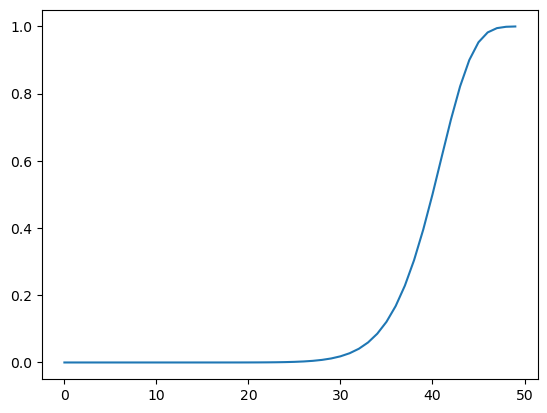

In [47]:
cdf = PV_ICE.weibull_cdf(12.596192434998898, 41.18098)

year = range(0,50,1)
cdfs = pd.DataFrame(index=year, columns=['cdf'], dtype=float)
for yr in year:
    cdfs.loc[yr] = cdf(yr)
    
#round(cdfs,2)
plt.plot(cdfs)
